<table class="tfo-notebook-buttons" align="left">
<td>
    <a target="_blank" href="https://colab.research.google.com/github/Harvard-am216/2019-spring/blob/master/Labs/Intro_Python_TensorFlow.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td>
</table>

In [0]:
from __future__ import division
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
import scipy.optimize as spopt

# 0. Use of Jupyter Notebook (Colab)

Use the three blocks of operations as a start

### 0.1 Click a block or hit esc and see it turns blue. Then hit
   - `B` to create a new block
   - `M` to turn the block to markdown mode
   - `Y` to turn it to code mode
       - `shift+return` to execute markdown and code
   - `F` to find and replace
   - `J` to the next block
   - `H` for help of shortcuts
   - `P` to search command
   - `DD` (type `D` two times) to delete a cell
   - `Z` to undo cell deletion
   - `shift+J` to select multiple blocks (including the result of executed code) for copy and past
   - ...
### 0.2 Markdown cell
   - `esc` + `1-4`: Creating titles level 1 to 5 (Or manually type the corresponding number of `#`)
   - Code illustration
        ```python 
                print("Hello World")
        ```
   - Double click this cell to see bullet points
### 0.3 Insert image
   - No shortcut. Click Edit -> Insert Image

# 1. Intro to Python
### 1.1 Some semantics (find out more by doing)
### 1.2 Containers with `numpy` and I/O
### 1.3 Plotting
### 1.4 Other packages (Will introduce when we use them)

### 1.1 Some semantics (find out more by doing)

These are just some of the most common semantics that comes to my mind. 
- If never used python, reading more sample codes online is definitely helpful

#### operations

In [0]:
print(11//5)
print(11%5)
print(2**4)

2
1
16


In [0]:
a=2
a++ # Note that python doesn't have built in increments

SyntaxError: ignored

In [0]:
a=2
a+=1 #It does have an increment shorthand, however
print(a)

3


#### `for` and `if`

In [0]:
for i in range(10): # for loop
    if i%2==0: # if loop
        print("even", i) # indent (automatic in jupyter). Counts from 0
    else:
        print("odd", i)

even 0
odd 1
even 2
odd 3
even 4
odd 5
even 6
odd 7
even 8
odd 9


#### Flexibility for `for`

In [0]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)
# Prints "cat", "dog", "monkey".

cat
dog
monkey


In [0]:
animals = ['cat', 'dog', 'monkey']
for i in range(len(animals)):
    print(animals[i])
# Prints "cat", "dog", "monkey"

cat
dog
monkey


#### Functions

In [0]:
def quicksort(numlist): # numlist is a list of unsorted numbers to be sorted
    if len(numlist) <= 1:
        return numlist # If length smaller than 1, arr is already sorted
    pivot = numlist[len(numlist) // 2] # // gives the ceiling integer. 11//2=5
    left = [x for x in numlist if x < pivot] # like "for x in numlist, if x<pivot, collect x into a list 'left'"
    middle = [x for x in numlist if x == pivot]
    right = [x for x in numlist if x > pivot]
    return quicksort(left) + middle + quicksort(right) # recursively sort

print(quicksort([3,6,8,10,1,2,1]))
# Prints "[1, 1, 2, 3, 6, 8, 10]"

[1, 1, 2, 3, 6, 8, 10]


#### Booleans

In [0]:
t = True
f = False
print(type(t)) # Prints "<class 'bool'>"
print(t and f) # Logical AND; prints "False"
print(t or f)  # Logical OR; prints "True"
print(not t)   # Logical NOT; prints "False"
print(t != f)  # Logical XOR; prints "True"

<class 'bool'>
False
True
False
True


#### More examples can be found online. Or use help

In [0]:
help(np.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence of str, optional
  

### 1.2 Containers (+numpy) and I/O

### Lists

In [0]:
a_list = [1,2,3]
a_list.append(1)
a_list

[1, 2, 3, 1]

#### What can you do with a list? Try them out

In [0]:
[method for method in a_list.__dir__() if method[0]!='_'] # methods that are not for internal use or for name mangling

['clear',
 'copy',
 'append',
 'insert',
 'extend',
 'pop',
 'remove',
 'index',
 'count',
 'reverse',
 'sort']

In [0]:
# read the documents if needed
help(a_list.insert)

Help on built-in function insert:

insert(...) method of builtins.list instance
    L.insert(index, object) -- insert object before index



### Tuples

In [0]:
a_tuple = (1,2,3)
# What can you do with a tuple?
[method for method in a_tuple.__dir__() if method[0]!='_']

['index', 'count']

### Dictionaries for fast search

In [0]:
my_dict = {'name':'Jack', 'age': 26}

# Output: Jack
print(my_dict['name'])

# Output: 26
print(my_dict.get('age'))

my_dict.get('address')

Jack
26


In [0]:
my_dict['address'] # Trying to access keys which doesn't exist using this method throws error

KeyError: ignored

In [0]:
my_dict = {'name':'Jack', 'age': 26}

# update value
my_dict['age'] = 27

#Output: {'age': 27, 'name': 'Jack'}
print(my_dict)

# add item
my_dict['address'] = 'Downtown'  

# Output: {'address': 'Downtown', 'age': 27, 'name': 'Jack'}
print(my_dict)

{'name': 'Jack', 'age': 27}
{'name': 'Jack', 'age': 27, 'address': 'Downtown'}


#### I/O: open, read, and save data to file

The context manager `with` closes the file after execution

In [0]:
#Note, this pre-written code may not work outside of Google Co-Lab.
#Adjust as neccessary
with open('sample_data/README.md','r') as file_in: # try to put a local directory to `your_file_name`
    readme = file_in.readlines()

#Often time data will be stored in files which can be imported into python.
#Python has many tools and packages which allow you to easily 
print(readme)

['This directory includes a few sample datasets to get you started.\n', '\n', '*   `california_housing_data*.csv` is California housing data from the 1990 US\n', '    Census; more information is available at:\n', '    https://developers.google.com/machine-learning/crash-course/california-housing-data-description\n', '\n', '*   `mnist_*.csv` is a small sample of the\n', '    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is\n', '    described at: http://yann.lecun.com/exdb/mnist/\n', '\n', '*   `anscombe.json` contains a copy of\n', "    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it\n", '    was originally described in\n', '\n', "    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American\n", '    Statistician. 27 (1): 17-21. JSTOR 2682899.\n', '\n', '    and our copy was prepared by the\n', '    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/

In [0]:
#Similarly, Python can also save data.
with open("sample_data/new_file.txt",'w') as file_out:
    file_out.writelines("This is a text sentence")

Now we want to import actual data from a comma-delimited file (CSV).  Often times there exist packages which allow for quick, clean importing of data.  One such popular package is [numpy](https://numpy.org/).  We will discuss numpy more in the next section, but we want to show its powerful importing capabilities here:

In [0]:
from numpy import genfromtxt
my_data = genfromtxt('sample_data/california_housing_train.csv', delimiter=',')
print(my_data)

[[        nan         nan         nan ...         nan         nan
          nan]
 [-1.1431e+02  3.4190e+01  1.5000e+01 ...  4.7200e+02  1.4936e+00
   6.6900e+04]
 [-1.1447e+02  3.4400e+01  1.9000e+01 ...  4.6300e+02  1.8200e+00
   8.0100e+04]
 ...
 [-1.2430e+02  4.1840e+01  1.7000e+01 ...  4.5600e+02  3.0313e+00
   1.0360e+05]
 [-1.2430e+02  4.1800e+01  1.9000e+01 ...  4.7800e+02  1.9797e+00
   8.5800e+04]
 [-1.2435e+02  4.0540e+01  5.2000e+01 ...  2.7000e+02  3.0147e+00
   9.4600e+04]]


Sometimes it is useful to pull files from your Google Drive.  This can be done using the following functions:

In [0]:
import os
os.listdir()

['.config', 'gdrive', 'sample_data']

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Numpy

In [0]:
import numpy as np

In [0]:
a_array = np.linspace(2.0, 3.0, num=5)

it provides much more methods

In [0]:
[method for method in a_array.__dir__() if method[0]!='_']

['dumps',
 'dump',
 'all',
 'any',
 'argmax',
 'argmin',
 'argpartition',
 'argsort',
 'astype',
 'byteswap',
 'choose',
 'clip',
 'compress',
 'conj',
 'conjugate',
 'copy',
 'cumprod',
 'cumsum',
 'diagonal',
 'dot',
 'fill',
 'flatten',
 'getfield',
 'item',
 'itemset',
 'max',
 'mean',
 'min',
 'newbyteorder',
 'nonzero',
 'partition',
 'prod',
 'ptp',
 'put',
 'ravel',
 'repeat',
 'reshape',
 'resize',
 'round',
 'searchsorted',
 'setfield',
 'setflags',
 'sort',
 'squeeze',
 'std',
 'sum',
 'swapaxes',
 'take',
 'tobytes',
 'tofile',
 'tolist',
 'tostring',
 'trace',
 'transpose',
 'var',
 'view',
 'ndim',
 'flags',
 'shape',
 'strides',
 'data',
 'itemsize',
 'size',
 'nbytes',
 'base',
 'dtype',
 'real',
 'imag',
 'flat',
 'ctypes',
 'T']

- Element by element addition/multiplication

In [0]:
a_array = np.array([1,2,3])
b_array = np.array([4,5,6])
a_array+b_array

array([5, 7, 9])

In [0]:
a_list = [1,2,3]
b_list = [4,5,6]
a_list+b_list # they are concatenated 

[1, 2, 3, 4, 5, 6]

In [0]:
a_list * 2 # copied twice

[1, 2, 3, 1, 2, 3]

In [0]:
a_array * 2 # element-wise multiplication

array([2, 4, 6])

#### Slicing of list and array

In [0]:
a_list = [1,2,3,4,5]
print(a_list[2:4])
print(a_list[1:])
print(a_list[:4])
print(a_list[:-1])

[3, 4]
[2, 3, 4, 5]
[1, 2, 3, 4]
[1, 2, 3, 4]


In [0]:
a_array = np.arange(1,6)
print(a_array[2:4])
print(a_array[1:])
print(a_array[:4])
print(a_array[:-1])

[3 4]
[2 3 4 5]
[1 2 3 4]
[1 2 3 4]


#### Read text data by `numpy.loadtxt` (Check out `pandas`, which provides a richer framework for data processing)

### 1.3 Plotting

In [0]:
import matplotlib.pyplot as plt

Plot the zeroth order Bessel function

`scipy` also provides you access to special functions

In [0]:
from scipy import special

In [0]:
x=np.linspace(0,100,1000)
x_num=np.linspace(0.5,100,200)
bessel = special.j0(x)
numerical = (2./(x_num*np.pi))**0.5*np.cos(x_num-np.pi/4)

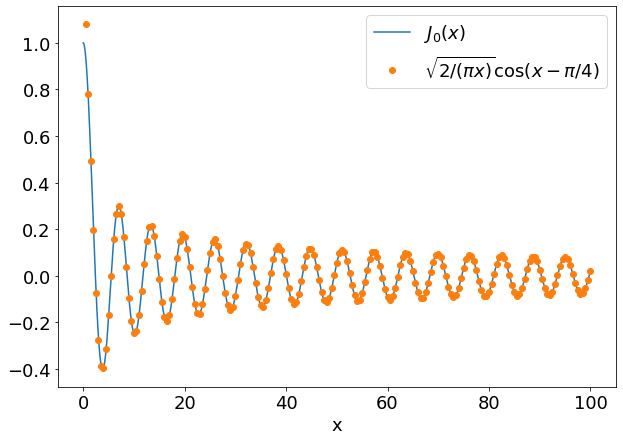

In [0]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,7))
plt.plot(x,bessel,label='$J_0(x)$')
plt.plot(x_num,numerical,'o',label='$\sqrt{2/(\pi x)}\cos(x-\pi/4)$')
plt.xlabel('x')
#plt.ylabel()
plt.legend(loc='best');

Plotting multiple figures. 
`plt.subplots`
`fig.ax = ` means `plt.subplots` has two return values.
To read more about subplots, check out the matplotlib's source material 

Text(0.5, 1.0, 'A single plot')

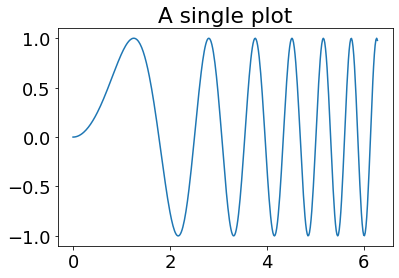

In [0]:
# sphinx_gallery_thumbnail_number = 11

import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')



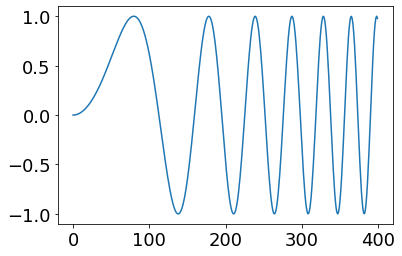

In [0]:
plt.plot(y)

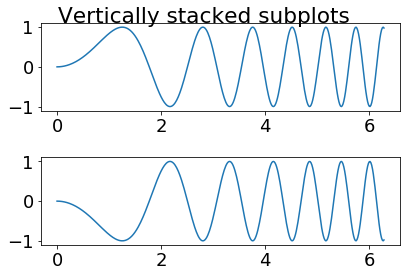

In [0]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)
fig.tight_layout() #Tight layout fixes clipping issues which can occur with multiple plots

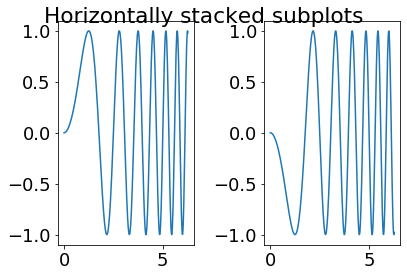

In [0]:

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)
fig.tight_layout()

Now we can use these subplotting capabilites to plot the data we imported in *Section 1.2*.

In [0]:
my_data.shape #We can find the shape of our data, telling us how many subplots to make
# The shape tells us that there are 9 datasets to plot

(17001, 9)

In [0]:
plt.plot(my_data[0,:])

0

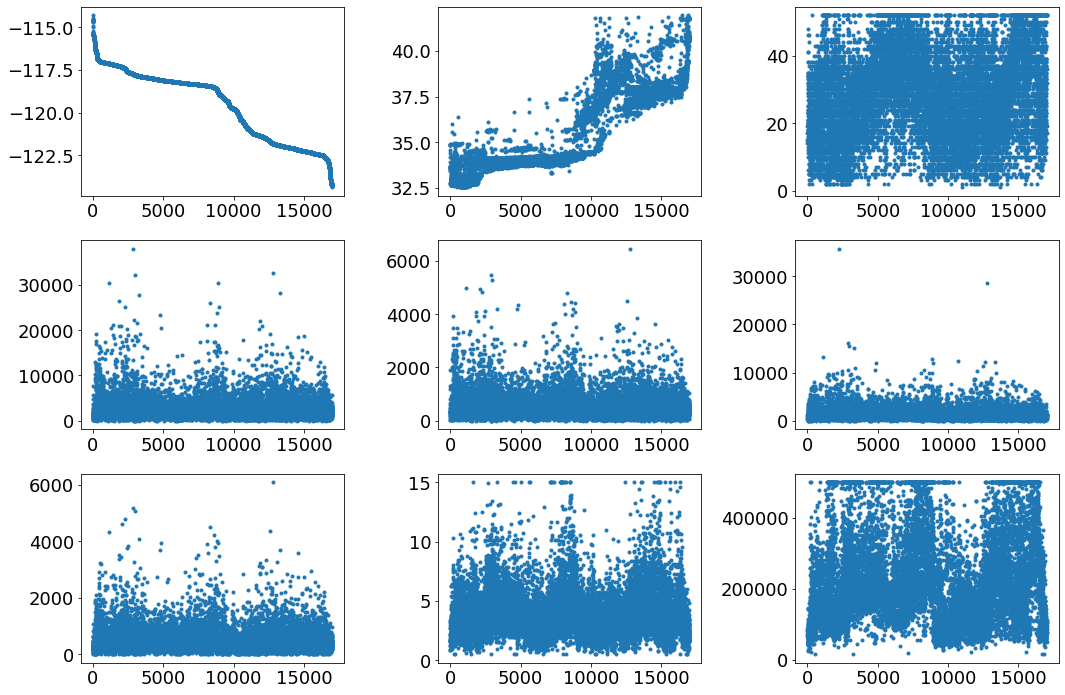

In [0]:
fig,ax = plt.subplots(3,3,figsize=(15,10))
for i in range(9):
    ax[i//3,i%3].plot(my_data[:,i], '.')
fig.tight_layout()
fig.show()

# 2. Intro to tensorflow: Hand-writing recognition

## 2.0 A warm-up using PCA

The method to fetch MNIST dataset from `sklearn` is no longer working. Here I rewrite using torch

In [0]:
import torchvision.datasets as datasets

0it [00:00, ?it/s]

9920512it [00:01, 9104229.59it/s]                            


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 140239.54it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


1654784it [00:00, 2581703.49it/s]                           
0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


8192it [00:00, 53783.90it/s]            
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


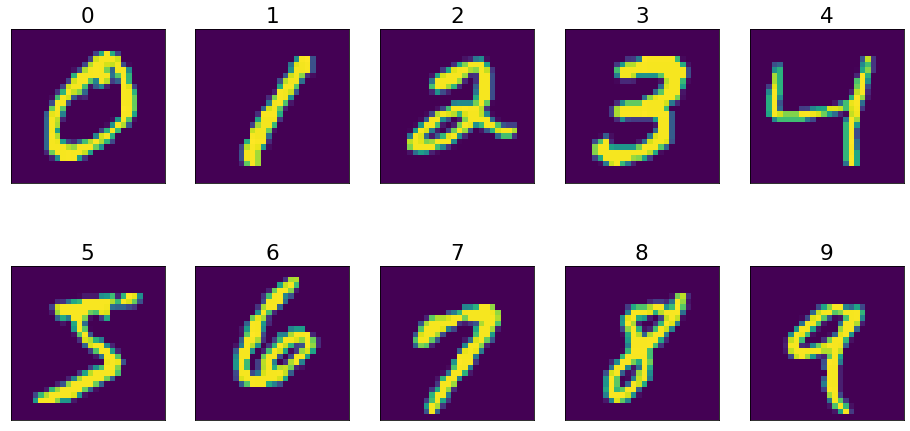

In [0]:
data = datasets.MNIST(root='.', download=True)
train_data = data.train_data.reshape(-1,784)
train_labels = data.train_labels.reshape(-1,1)
inds = np.array([np.where(train_labels==i)[0] for i in range(10)])

f,ax=plt.subplots(2,5,figsize=(16,8))
ax=ax.flatten()
for i in range(10):
    ax[i].imshow(train_data[inds[i][0]].reshape(28,28))
    ax[i].set_title(str(i))
    ax[i].set_xticks(())
    ax[i].set_yticks(())
plt.show()

#### plot two random projections: (unit vectors with the 286th and 472th column as 1)

Hmmm, random projection doesn't make too much sense

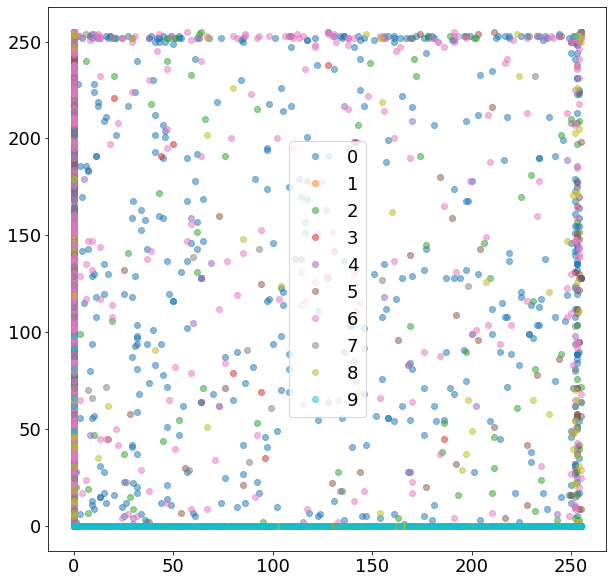

In [0]:
plt.figure(figsize=(10,10))
r1=np.zeros(28*28)
r2=np.zeros(28*28)
r1[286]=1
r2[472]=1
for i in range(10):
    plt.plot(np.dot(train_data[inds[i]],r1),
             np.dot(train_data[inds[i]],r2),
             'o', label=str(i), alpha=0.5)
plt.legend();

#### Plot the two principal components from PCA:

Decomposition using 20 components and plotting the first 2

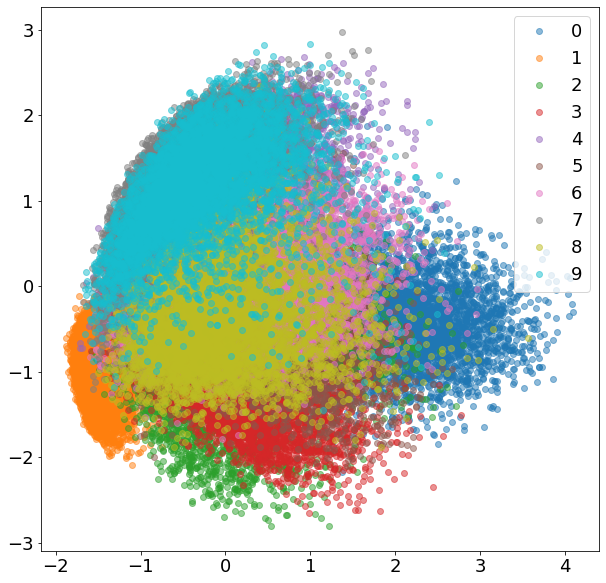

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20, whiten=True)
pca.fit(train_data)
mnist_reduced=pca.transform(train_data)
plt.figure(figsize=(10,10))
for i in range(10):
    plt.plot(mnist_reduced[inds[i],0],
             mnist_reduced[inds[i],1],
             'o', label=str(i), alpha=0.5)
plt.gca().legend()
plt.show()

#### Perform K-Means clustering on the first 10 dimensions:

In [0]:
from sklearn.cluster import KMeans
k=KMeans(n_clusters=10)
k.fit(mnist_reduced[:,:10]);

#### To evaluate results, we construct the matrix `mat` such that `mat[i,j]` is the number of digits of label `i` that are classified as belonging to cluster `j`

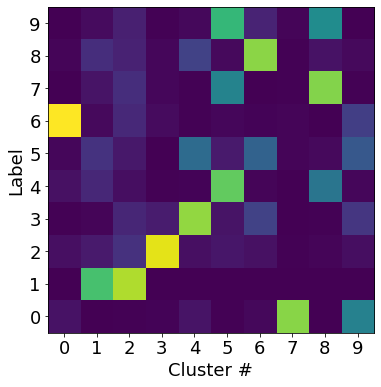

In [0]:
labels=[k.labels_[i] for i in inds]
#mat is matrix such that 
mat=[np.bincount(l) for l in labels]
plt.figure(figsize=(6,6))
plt.gca().set_xticks(range(10))
plt.gca().set_yticks(range(10))
plt.gca().set_xlabel('Cluster #')
plt.gca().set_ylabel('Label')
plt.imshow(mat,origin='lower')
plt.show()

It looks like most clusters correspond quite overwhelmingly to a given label. Note though that some figures are harder to distinguish

## 2.1 Neural Network constructed using high level API Keras

Load the `tf.keras` mnist dataset and build a NN with one fully connected layer of 512 nodes and another fully connected softmax layer.

#### If you are curious about the `Dropout` operation, check this out: https://www.python-course.eu/neural_networks_with_dropout.php . Basically dropout reduces overfitting and enhances the robustness.

In [0]:
import tensorflow as tf
import numpy as np
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2), # dropout probability 0.2
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2173 - acc: 0.9360
Epoch 2/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0969 - acc: 0.9703
Epoch 3/5
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0684 - acc: 0.9782
Epoch 4/5
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0541 - acc: 0.9820
Epoch 5/5
10000/10000 [==============================] - 1s 59us/sample - loss: 0.0643 - acc: 0.9809


[0.0642609841159603, 0.9809]

Construct again the matrix that shows how many of each label were classified as which label

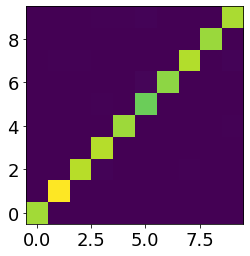

In [0]:
predictions=np.argmax(model.predict(x_test),axis=1)
keras_mat=np.zeros([10,10],dtype='i')
label_v=y_test
for i in range(10):
    for j in range(10):
        keras_mat[i,j]=np.bitwise_and(label_v==i , predictions==j).sum()
plt.figure()
plt.imshow(keras_mat,origin='lower')
plt.show()

This is much better, as you can clearly see. Note, though, that the error in the training set is lower than that of the validation set, a sign of (slight) overfitting:

In [0]:
print("Train loss is %f and accuracy is %f"      %  tuple(model.evaluate(x_train, y_train, verbose=0)))
print("Test loss is %f and accuracy is %f" %  tuple(model.evaluate(x_test, y_test, verbose=0)))

Train loss is 0.020617 and accuracy is 0.994000
Test loss is 0.064261 and accuracy is 0.980900


## 2.2 Using Eager execution

## Basics

Eager execution is a flexible machine learning platform for research and
experimentation, providing:

* *An intuitive interface*—Structure your code naturally and use Python data
  structures. Quickly iterate on small models and small data.
* *Easier debugging*—Call ops directly to inspect running models and test
  changes. Use standard Python debugging tools for immediate error reporting.
* *Natural control flow*—Use Python control flow instead of graph control

Otherwise the construction of a computation graph is required to use TF.

- Semantic requirement: `tf.enable_eager_execution` must be called at program startup.
- If you want to switch back and forth, restart the kernel.

In [0]:
## Restart kernel first

from __future__ import absolute_import, division, print_function

import tensorflow as tf

tf.enable_eager_execution()

ValueError: ignored

In [0]:
x = [[2.]]
m = tf.matmul(x, x) # For matrix multiplication. For tensor contraction, use tensordot
print("hello, {}".format(m))

hello, [[4.]]


**Eager execution works nicely with NumPy.** NumPy operations accept tf.Tensor arguments. TensorFlow math operations convert Python objects and NumPy arrays to tf.Tensor objects. The tf.Tensor.numpy method returns the object's value as a NumPy ndarray.

In [0]:
a = tf.constant([[1, 2],
                 [3, 4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [0]:
# Broadcasting support
b = tf.add(a, 1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [0]:
# Use NumPy values
import numpy as np

c = np.multiply(a, b)
print(c)

[[ 2  6]
 [12 20]]


### How to define a `tf.Tensor` object?
- <a target="_blank" href="https://www.tensorflow.org/api_docs/python/tf/Variable"> tf.Variable </a>
- <a target="_blank" href="https://www.tensorflow.org/api_docs/python/tf/constant"> tf.constant </a>
- <a target="_blank" href="https://www.tensorflow.org/api_docs/python/tf/zeros"> tf.zeros </a>
- <a target="_blank" href="https://www.tensorflow.org/api_docs/python/tf/linspace"> tf.linspace </a>
- <a target="_blank" href="https://www.tensorflow.org/api_docs/python/tf/range"> tf.range </a>
- <a target="_blank" href="https://www.tensorflow.org/api_docs/python/tf/random/normal"> tf.random.normal </a>

They almost follow the numpy tradition, which makes it easy to come up with a name and look up.

#### Rank 0

The first value is the initial value

In [0]:
mammal = tf.Variable("Elephant", tf.string)
ignition = tf.Variable(451, tf.int16)
floating = tf.Variable(3.14159265359, tf.float64)
its_complicated = tf.Variable(12.3 - 4.85j, tf.complex64)

#### Rank 1

In [0]:
mystr = tf.Variable(["Hello"], tf.string)
cool_numbers  = tf.Variable([3.14159, 2.71828], tf.float32)
first_primes = tf.Variable([2, 3, 5, 7, 11], tf.int32)
its_very_complicated = tf.Variable([12.3 - 4.85j, 7.5 - 6.23j], tf.complex64)

#### Higher ranks

A batch of image with shape [batch_size \* height \* width \* color]

In [0]:
my_image = tf.zeros([10, 299, 299, 3])  # batch x height x width x color

## Build a model

We just used Keras (`tf.keras.Model`) to stack layers together. 

In [0]:
class MNISTModel(tf.keras.Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(units=10)
        self.dense2 = tf.keras.layers.Dense(units=10)

    def call(self, input):
        """Run the model."""
        result = self.dense1(input)
        result = self.dense2(result)
        result = self.dense2(result)  # reuse variables from dense2 layer
        return result

model = MNISTModel()

## 2.3 More for Eager execution

Here the model calculates $Wx+B$ for input $x$

In [0]:
import tensorflow as tf

tf.enable_eager_execution()

class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        self.W = tf.Variable(5., name='weight') # initialized as 5
        self.B = tf.Variable(10., name='bias') # initialized as 10
    def call(self, inputs): 
        return inputs * self.W + self.B # calculates output (y)

- `tf.GradientTape()` Check out "Automatic differentiation"
    - Record operations for automatic differentiation.
    - All forward-pass operations are recorded to a "tape". To compute the gradient, play the tape backwards.
    - By default GradientTape will automatically watch any trainable variables that are accessed inside the context.

In [0]:
# Simple example of GradientTape

x = tf.Variable(3.0)
with tf.GradientTape() as tape:
    loss = x * x
print(tape.gradient(loss, x).numpy()) # Computes 6.0

6.0


In [0]:
# A toy dataset of points around 3 * x + 2
NUM_EXAMPLES = 2000
training_inputs = tf.random_normal([NUM_EXAMPLES])
noise = tf.random_normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise

# To run, we need to define:
# 1. A model.
# 2. Derivatives of a loss function with respect to model parameters.
# 3. A strategy for updating the variables based on the derivatives.

# 1. A model.
model = Model()

# 2. Derivatives of a loss function with respect to model parameters.
def loss(model, inputs, targets):
    error = model(inputs) - targets # model(inputs) will trigger `call`
    return tf.reduce_mean(tf.square(error)) # `reduce_mean` computes the mean of elements across dimensions

def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return tape.gradient(loss_value, [model.W, model.B])

# 3. A strategy for updating the variables based on the derivatives.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) # this optimizer actually implements gradient descent

print("Initial loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))

# Training loop
for i in range(300):
    grads = grad(model, training_inputs, training_outputs)
    optimizer.apply_gradients(zip(grads, [model.W, model.B]),
                            global_step=tf.train.get_or_create_global_step())
    if i % 20 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, loss(model, training_inputs, training_outputs)))

print("Final loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))
print("W = {}, B = {}".format(model.W.numpy(), model.B.numpy()))

Initial loss: 69.169
Loss at step 000: 66.472
Loss at step 020: 30.210
Loss at step 040: 14.041
Loss at step 060: 6.832
Loss at step 080: 3.617
Loss at step 100: 2.184
Loss at step 120: 1.544
Loss at step 140: 1.259
Loss at step 160: 1.132
Loss at step 180: 1.076
Loss at step 200: 1.050
Loss at step 220: 1.039
Loss at step 240: 1.034
Loss at step 260: 1.032
Loss at step 280: 1.031
Final loss: 1.030
W = 3.0041298866271973, B = 2.0079257488250732


## **Graph mode: A simple regression by TF

Under graph mode, 
- a computation graph is created beforehand
- In order to run, a `tf.Session()` needs to be created


In [0]:
# liner regression by tensorflow

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def showData(x, y):
    plt.scatter(x, y)
    plt.show()

# create data
np.random.seed(314)
x = np.random.rand(100).astype(np.float32)
y = x * 0.1 + 0.3
showData(x, y)

### create tensorflow structure start ###
weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))
y_pred = weights * x + biases
loss = tf.reduce_mean(tf.square(y_pred - y))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
### create tensorflow structure end ###

session = tf.Session()
session.run(init)

for step in range(201):
    session.run(train)
    if step % 20 == 0:
        print(step, session.run(weights), session.run(biases))

session.close()

<Figure size 640x480 with 1 Axes>

0 [0.25680435] [0.29479048]
20 [0.13231948] [0.28273433]
40 [0.10841328] [0.29550546]
60 [0.10219014] [0.29883]
80 [0.10057013] [0.29969543]
100 [0.10014843] [0.2999207]
120 [0.10003864] [0.2999794]
140 [0.10001006] [0.29999465]
160 [0.10000262] [0.2999986]
180 [0.10000068] [0.29999965]
200 [0.1000002] [0.29999992]
